
<h1><center><u> MNIST in Keras </u></center></h1>

### To use Image Classification Techniques to identify hand written digits.

In [1]:
%matplotlib inline

To help you understand the fundamentals of deep learning, this demo will walk through the basic steps of building two toy models for classifying handwritten numbers with accuracies surpassing 95%. The first model will be a basic fully-connected neural network, and the second model will be a deeper network that introduces the concepts of convolution and pooling.

## **The Task for the Artificial Intelligence**

Our goal is to construct and train an artificial neural network on thousands of images of handwritten digits so that it may successfully identify others when presented. The data that will be incorporated is the MNIST database which contains 60,000 images for training and 10,000 test images. We will use the Keras Python API with TensorFlow as the backend.

<img src="https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/mnist.png?raw=1" >

## **Prerequisite Python Modules**

First, some software needs to be loaded into the Python environment.

In [2]:
import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers

from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used

from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils                         # NumPy related tools

## **Loading Training Data**

The MNIST dataset is conveniently bundled within Keras, and we can easily analyze some of its features in Python.

In [3]:
# The MNIST data is split between 60,000 28 x 28 pixel training images and 10,000 28 x 28 pixel images
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


Using matplotlib, we can plot some sample images from the training set directly into this Jupyter Notebook.

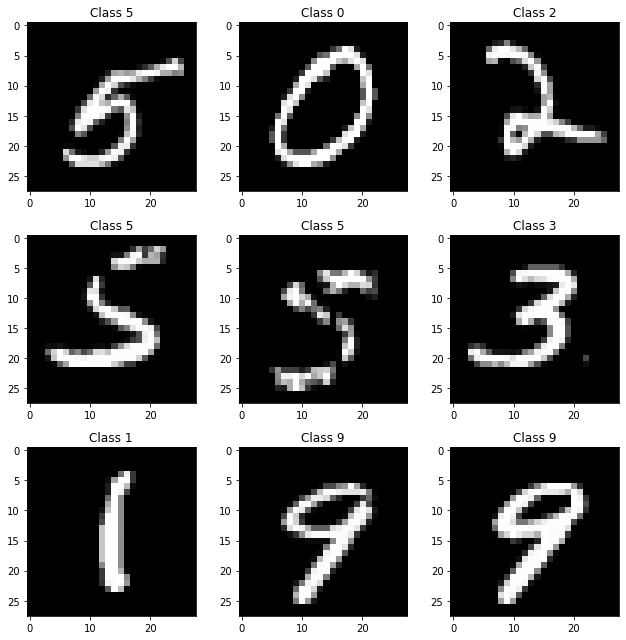

In [4]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

Let's examine a single digit a little closer, and print out the array representing the last digit.

In [5]:
# just a little function for pretty printing a matrix
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

# now print!        
matprint(X_train[num])

0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  
0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  
0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  
0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  
0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  
0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  
0  0  0  0  0  0  0    0    0    0    0    0    0   55  134  217  254  254  254  254  156   47   0  0  0  0  0  0  
0  0  0  0  0  0  0    0    0    0    5   73  214  250  253  234  233  233  218  173  254  218   0  0  0  0  0  0  
0  0  0  0  0  0  0    0    0    0  156  253  253  240  100    0    0   

Each pixel is an 8-bit integer from 0-255. 0 is full black, while 255 is full white. This what we call a single-channel pixel. It's called monochrome.

*Fun-fact! Your computer screen has three channels for each pixel: red, green, blue. Each of these channels also likely takes an 8-bit integer. 3 channels -- 24 bits total -- 16,777,216 possible colors!*

## **Formatting the input data layer**

The **flattening step** is a refreshingly simple step involved in building a convolutional neural network.

It involves taking the pooled feature map that is generated in the pooling step and transforming it into a one-dimensional vector.

The reason why we transform the pooled feature map into a one-dimensional vector is because this vector will now be fed into an artificial neural network. Said differently, this vector will now become the input layer of an artificial neural network that will be chained onto the convolutional neural network we've been building so far in this course.

In our data, Instead of a 28 x 28 matrix, we build our network to accept a 784-length vector.

Each image needs to be then reshaped (or flattened) into a vector. We'll also normalize the inputs to be in the range [0-1] rather than [0-255]. Normalizing inputs is generally recommended, so that any additional dimensions (for other network architectures) are of the same scale.

<img src='https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/flatten.png?raw=1' >

In [6]:
X_train = X_train.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors.
X_test = X_test.reshape(10000, 784)   # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.

X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                        # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


We then modify our classes (unique digits) to be in the one-hot format, i.e.

```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.
```

If the final output of our network is very close to one of these classes, then it is most likely that class. For example, if the final output is:

```
[0, 0.94, 0, 0, 0, 0, 0.06, 0, 0]
```
then it is most probable that the image is that of the digit `1`.

In [7]:
nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

## **Building a 3-layer fully connected network (FCN)**

<img src="https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/figure.png?raw=1" />

**What is sequential model?**

A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor. Schematically, the following Sequential model: 

In [8]:
# The Sequential model is a linear stack of layers and is very common.

model = Sequential()

## **The first hidden layer**

The **hidden layers** of a CNN typically consist of convolutional layers, pooling layers, fully connected layers, and normalization layers. Here it simply means that instead of using the normal activation functions defined above, convolution and pooling functions are used as activation functions.

**Dense Layer** is simple layer of neurons in which each neuron receives input from all the neurons of previous layer, thus called as dense. Dense Layer is used to classify image based on output from convolutional layers. Working of single neuron. A layer contains multiple number of such neurons.

In [9]:
# The first hidden layer is a set of 512 nodes (artificial neurons).
# Each node will receive an element from each input vector and apply some weight and bias to it.

model.add(Dense(512, input_shape=(784,))) #(784,) is not a typo -- that represents a 784 length vector!

## **Activation function**
**The activation function** compares the input value to a threshold value. If the input value is greater than the threshold value, the neuron is activated. It's disabled if the input value is less than the threshold value, which means its output isn't sent on to the next or hidden layer.

**Why do we need activation functions?**
 
An activation function determines if a neuron should be activated or not activated. This implies that it will use some simple mathematical operations to determine if the neuron’s input to the network is relevant or not relevant in the prediction process.

The ability to introduce non-linearity to an artificial neural network and generate output from a collection of input values fed to a layer is the purpose of the activation function.

**Types of Activation functions**
 
Activation functions can be divided into three types:

Linear Activation Function
Binary Step Function
Non-linear Activation Functions

**Linear Activation Function**
 
The linear activation function, often called the identity activation function, is proportional to the input. The range of the linear activation function will be (-∞ to ∞). The linear activation function simply adds up the weighted total of the inputs and returns the result

**Binary Step Activation Function**
 
A threshold value determines whether a neuron should be activated or not activated in a binary step activation function.

The activation function compares the input value to a threshold value. If the input value is greater than the threshold value, the neuron is activated. It’s disabled if the input value is less than the threshold value, which means its output isn’t sent on to the next or hidden layer.

**Non-linear Activation Functions**
 
The non-linear activation functions are the most-used activation functions. They make it uncomplicated for an artificial neural network model to adapt to a variety of data and to differentiate between the outputs.

Non-linear activation functions allow the stacking of multiple layers of neurons, as the output would now be a non-linear combination of input passed through multiple layers. Any output can be represented as a functional computation output in a neural network.

These activation functions are mainly divided basis on their range and curves. The remainder of this article will outline the major non-linear activiation functions used in neural networks.

**1. Sigmoid**
 
Sigmoid accepts a number as input and returns a number between 0 and 1. It’s simple to use and has all the desirable qualities of activation functions: nonlinearity, continuous differentiation, monotonicity, and a set output range.

$$
  f(x) = \frac{1}{1\ –\ e^{-x}}
$$

Where “$n$” is the value of the hidden layer node, the same as the first equation above. This transfer function allows the output to model non-linear system behavior, which most real-world problems will exhibit
This is mainly used in binary classification problems. This sigmoid function gives the probability of an existence of a particular class.

**2.TanH (Hyperbolic Tangent)**
 
TanH compress a real-valued number to the range [-1, 1]. It’s non-linear, But it’s different from Sigmoid,and its output is zero-centered. The main advantage of this is that the negative inputs will be mapped strongly to the negative and zero inputs will be mapped to almost zero in the graph of TanH.

**3.ReLU (Rectified Linear Unit)**
 
ReLU stands for Rectified Linear Unit and is one of the most commonly used activation function in the applications. It’s solved the problem of vanishing gradient because the maximum value of the gradient of ReLU function is one. It also solved the problem of saturating neuron, since the slope is never zero for ReLU function. The range of ReLU is between 0 and infinity.

**4.Leaky ReLU**
 
Leaky ReLU is an upgraded version of the ReLU activation function to solve the dying ReLU problem, as it has a small positive slope in the negative area. But, the consistency of the benefit across tasks is presently ambiguous.

**5. Softmax**
 
A combination of many sigmoids is referred to as the Softmax function. It determines relative probability. Similar to the sigmoid activation function, the Softmax function returns the probability of each class/labels. In multi-class classification, softmax activation function is most commonly used for the last layer of the neural network.

The softmax function gives the probability of the current class with respect to others. This means that it also considers the possibility of other classes too.

**Important Considerations on Activation function**
 
While choosing the proper activation function, the following problems and issues must be considered:

Vanishing gradient is a common problem encountered during neural network training. Like a sigmoid activation function, some activation functions have a small output range (0 to 1). So a huge change in the input of the sigmoid activation function will create a small modification in the output. Therefore, the derivative also becomes small. These activation functions are only used for shallow networks with only a few layers. When these activation functions are applied to a multi-layer network, the gradient may become too small for expected training.

Exploding gradients are situations in which massive incorrect gradients build during training, resulting in huge updates to neural network model weights. When there are exploding gradients, an unstable network might form, and training cannot be completed. Due to exploding gradients, the weights’ values can potentially grow to the point where they overflow, resulting in loss in NaN values.

In [10]:
# An "activation" is a non-linear function applied to the output of the layer above.
# It checks the new value of the node, and decides whether that artifical neuron has fired.
# The Rectified Linear Unit (ReLU) converts all negative inputs to nodes in the next layer to be zero.
# Those inputs are then not considered to be fired.
# Positive values of a node are unchanged.

model.add(Activation('relu'))

$$f(x) = max (0,x)$$

**Dropout** is a technique where randomly selected neurons are ignored during training. They are “dropped out” randomly. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass, and any weight updates are not applied to the neuron on the backward pass.

In [11]:
# Dropout zeroes a selection of random outputs (i.e., disables their activation)
# Dropout helps protect the model from memorizing or "overfitting" the training data.
model.add(Dropout(0.2))

## **Adding the second hidden layer**

In [12]:
# The second hidden layer appears identical to our first layer.
# However, instead of each of the 512-node receiving 784-inputs from the input image data,
# they receive 512 inputs from the output of the first 512-node layer.

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

## **The Final Output Layer**

In [13]:
# The final layer of 10 neurons in fully-connected to the previous 512-node layer.
# The final layer of a FCN should be equal to the number of desired classes (10 in this case).
model.add(Dense(10))

In [14]:
# The "softmax" activation represents a probability distribution over K different possible outcomes.
# Its values are all non-negative and sum to 1.

model.add(Activation('softmax'))

In [15]:
# Summarize the built model

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5

## **Compiling the model**

Keras is built on top of Theano and TensorFlow. Both packages allow you to define a *computation graph* in Python, which then compiles and runs efficiently on the CPU or GPU without the overhead of the Python interpreter.

When compiing a model, Keras asks you to specify your **loss function** and your **optimizer**. The loss function we'll use here is called *categorical cross-entropy*, and is a loss function well-suited to comparing two probability distributions.

Our predictions are probability distributions across the ten different digits (e.g. "we're 80% confident this image is a 3, 10% sure it's an 8, 5% it's a 2, etc."), and the target is a probability distribution with 100% for the correct category, and 0 for everything else. The cross-entropy is a measure of how different your predicted distribution is from the target distribution.

The optimizer helps determine how quickly the model learns through **gradient descent**. The rate at which descends a gradient is called the **learning rate**.

So are smaller learning rates better? Not quite! It's important for an optimizer not to get stuck in local minima while neglecting the global minimum of the loss function. Sometimes that means trying a larger learning rate to jump out of a local minimum.

**Adam** is a replacement optimization algorithm for stochastic gradient descent for training deep learning models. Adam combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems.

**Categorical crossentropy** is a loss function that is used in multi-class classification tasks. These are tasks where an example can only belong to one out of many possible categories, and the model must decide which one. Formally, it is designed to quantify the difference between two probability distributions.

**A metric** is a function that is used to judge the performance of your model. Metric functions are similar to loss functions, except that the results from evaluating a metric are not used when training the model.

In [16]:
# Let's use the Adam optimizer for learning
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## **Train the model**


The batch size determines over how much data per step is used to compute the loss function, gradients, and back propagation. Large batch sizes allow the network to complete it's training faster; however, there are other factors beyond training speed to consider.

Too large of a batch size smoothes the local minima of the loss function, causing the optimizer to settle in one because it thinks it found the global minimum.

Too small of a batch size creates a very noisy loss function, and the optimizer may never find the global minimum.

So a good batch size may take some trial and error to find!

**An epoch** is when all the training data is used at once and is defined as the total number of iterations of all the training data in one cycle for training the machine learning model. Another way to define an epoch is the number of passes a training dataset takes around an algorithm

**verbose** is the choice that how you want to see the output of your Nural Network while it's training. If you set verbose = 0, It will show nothing.

**The batch size** is a number of samples processed before the model is updated. The number of epochs is the number of complete passes through the training dataset. The size of a batch must be more than or equal to one and less than or equal to the number of samples in the training dataset

In [17]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=5,
          verbose=1)

Epoch 1/5
469/469 [==============================] - 8s 16ms/step - loss: 0.2497 - accuracy: 0.9241
Epoch 2/5
469/469 [==============================] - 11s 23ms/step - loss: 0.1018 - accuracy: 0.9692
Epoch 3/5
469/469 [==============================] - 7s 15ms/step - loss: 0.0740 - accuracy: 0.9765
Epoch 4/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0557 - accuracy: 0.9821
Epoch 5/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0468 - accuracy: 0.9848


The two numbers, in order, represent the value of the loss function of the network on the training set, and the overall accuracy of the network on the training data. But how does it do on data it did not train on?

## **Evaluate Model's Accuracy on Test Data**

In [18]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0708 - accuracy: 0.9787
Test score: 0.07081123441457748
Test accuracy: 0.9786999821662903


### **Inspecting the output**

It's always a good idea to inspect the output and make sure everything looks sane. Here we'll look at some examples it gets right, and some examples it gets wrong.

In [19]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_x = model.predict(X_test)
predicted_classes = np.argmax(predicted_x,axis=1)
# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]

incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

313/313 [==============================] - 1s 3ms/step


**cmap** stands for colormap and it's a colormap instance or registered colormap name (cmap will only work if c is an array of floats). Matplotlib colormaps are divided into the following categories: sequential, diverging, and qualitative.

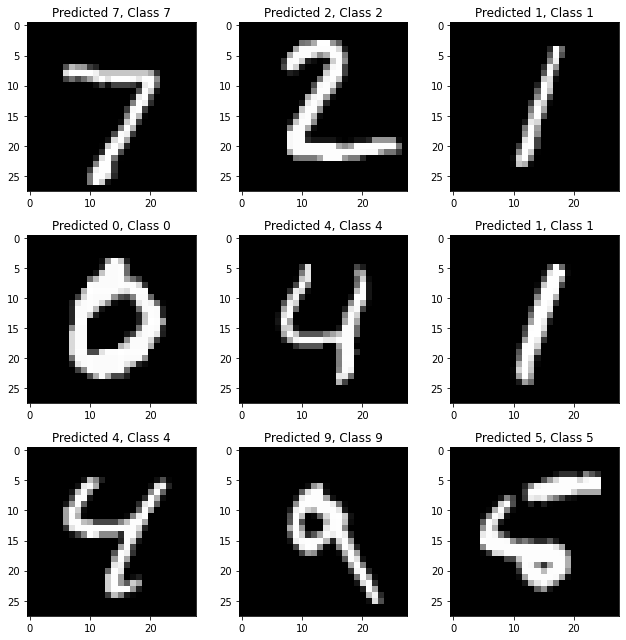

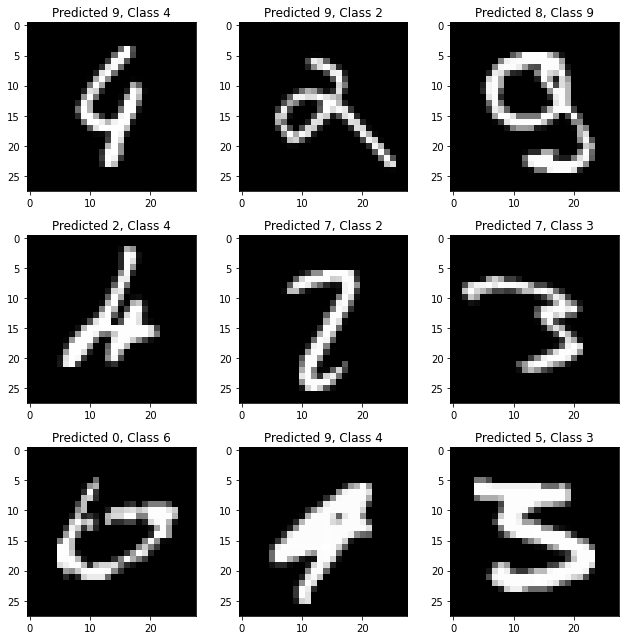

In [20]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.tight_layout()
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    
plt.tight_layout()

## **Trying experimenting with the batch size**

#### How does increasing the batch size to 10,000 affect the training time and test accuracy?

#### How about a batch size of 32?

# **Introducing Convolution**

Before, we built a network that accepts the normalized pixel values of each value and operates soley on those values. What if we could instead feed different features (e.g. **curvature, edges**) of each image into a network, and have the network learn which features are important for classifying an image?

This possible through convolution! Convolution applies **kernels** (filters) that traverse through each image and generate **feature maps**.

Let consider the image is a 5 x 5 matrix and the kernel going over it is a 3 x 3 matrix. A dot product operation takes place between the image and the kernel and the convolved feature is generated. Each kernel in a CNN learns a different characteristic of an image.

Kernels are often used in photoediting software to apply blurring, edge detection, sharpening, etc.

Kernels in deep learning networks are used in similar ways, i.e. highlighting some feature. Combined with a system called **max pooling**, the non-highlighted elements are discarded from each feature map, leaving only the features of interest, reducing the number of learned parameters, and decreasing the computational cost (e.g. system memory).

We can also take convolutions of convolutions -- we can stack as many convolutions as we want, as long as there are enough pixels to fit a kernel.

**What Is a Convolution?**

Convolution is an orderly procedure where two sources of information are intertwined; it’s an operation that changes a function into something else. Convolutions have been used for a long time typically in image processing to blur and sharpen images, but also to perform other operations. (e.g. enhance edges and emboss) CNNs enforce a local connectivity pattern between neurons of adjacent layers.

CNNs make use of filters (also known as kernels), to detect what features, such as edges, are present throughout an image. There are four main operations in a CNN:  

* Convolution

* Non Linearity (ReLU)

* Pooling or Sub Sampling

* Classification (Fully Connected Layer)

The first layer of a Convolutional Neural Network is always a Convolutional Layer. Convolutional layers apply a convolution operation to the input, passing the result to the next layer. A convolution converts all the pixels in its receptive field into a single value. For example, if you would apply a convolution to an image, you will be decreasing the image size as well as bringing all the information in the field together into a single pixel. The final output of the convolutional layer is a vector. Based on the type of problem we need to solve and on the kind of features we are looking to learn, we can use different kinds of convolutions.

**The 2D Convolution Layer**

The most common type of convolution that is used is the 2D convolution layer and is usually abbreviated as conv2D. A filter or a kernel in a conv2D layer “slides” over the 2D input data, performing an elementwise multiplication. As a result, it will be summing up the results into a single output pixel. The kernel will perform the same operation for every location it slides over, transforming a 2D matrix of features into a different 2D matrix of features.

**The Dilated or Atrous Convolution**
This operation expands window size without increasing the number of weights by inserting zero-values into convolution kernels. Dilated or Atrous Convolutions can be used in real time applications and in applications where the processing power is less as the RAM requirements are less intensive.

**Separable Convolutions**

There are two main types of separable convolutions: spatial separable convolutions, and depthwise separable convolutions. The spatial separable convolution deals primarily with the spatial dimensions of an image and kernel: the width and the height. Compared to spatial separable convolutions, depthwise separable convolutions work with kernels that cannot be “factored” into two smaller kernels. As a result, it is more frequently used.

**Transposed Convolutions**

These types of comvolutions are also known as deconvolutions or fractionally strided convolutions. A transposed convolutional layer carries out a regular convolution but reverts its spatial transformation.  

## **Building a "Deep" Convolutional Neural Network**

**What is Normalization vs Batch Normalization?**
* **Normalization** is a procedure to change the value of the numeric variable in the dataset to a typical scale, without misshaping contrasts in the range of value.

* **Batch normalization** is a technique for training very deep neural networks that normalizes the contributions to a layer for every mini-batch. This has the impact of settling the learning process and drastically decreasing the number of training epochs required to train deep neural networks.

**How is batch normalization performed in deep neural networks?**

* It does this scaling the output of the layer, explicitly by normalizing 
the activations of each input variable per mini-batch, for example, the enactments of a node from the last layer. Review that normalization alludes to rescaling data to have a mean of zero and a standard deviation of one.

* By brightening the inputs to each layer, it would make a stride towards accomplishing the fixed distributions of inputs that would evacuate the ill impacts of the internal covariate shift.

* Normalizing the activations of the earlier layer implies that presumptions the ensuing layer makes about the spread and distribution of inputs during the weight update won’t change, in any event not significantly. This has the impact of stabilizing and accelerating the preparation training procedure of deep neural networks.

* For little smaller mini-batches that don’t contain an agent distribution of models from the training dataset, the distinctions in the normalized inputs among training and inference (utilizing the model subsequent to training) can bring about perceptible contrasts in execution performance. This can be tended to with a change of the technique called Batch Renormalization that makes the appraisals of the variable mean and standard deviation increasingly stable across mini-batches.

* This normalization of inputs might be applied to the input variable for the first hidden layer or to the activation from a hidden layer for more profound layers.

* It tends to be utilized with most deep network types, for example, Convolutional Neural Networks (CNN) and Recurrent Neural Networks (RNN).

* It might be utilized on the inputs to the layer previously or after the activation function in the past layer.

* It might be increasingly proper after the activation function if for s-formed capacities like the hyperbolic tangent and logistic function.

* It might be fit prior to the activation function for activations that may rise in non-Gaussian scatterings like the rectified linear activation function (ReLU), the front line default for most deep neural network types.

* It offers some regularization impact, lessening generalization error, maybe done requiring the utilization of dropout for regularization.

* In the batch normalized network, the mean and variances remain moderately steady all through the network. For an unnormalized network, they seem to develop exponentially with profundity.

In [21]:
# import some additional tools

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from keras.layers.normalization.batch_normalization import BatchNormalization

In [22]:
# Reload the MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [23]:
# Again, do some formatting
# Except we do not flatten each image into a 784-length vector because we want to perform convolutions first

X_train = X_train.reshape(60000, 28, 28, 1) #add an additional dimension to represent the single-channel
X_test = X_test.reshape(10000, 28, 28, 1)

X_train = X_train.astype('float32')         # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                              # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


In [24]:
# one-hot format classes

nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [25]:
model = Sequential()                                 # Linear stacking of layers

# Convolution Layer 1
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1))) # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer01 = Activation('relu')                     # activation
model.add(convLayer01)

# Convolution Layer 2
model.add(Conv2D(32, (3, 3)))                        # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer02 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer02)

# Convolution Layer 3
model.add(Conv2D(64,(3, 3)))                         # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer03 = Activation('relu')                     # activation
model.add(convLayer03)

# Convolution Layer 4
model.add(Conv2D(64, (3, 3)))                        # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer04 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer04)
model.add(Flatten())                                 # Flatten final 4x4x64 output matrix into a 1024-length vector

# Fully Connected Layer 5
model.add(Dense(512))                                # 512 FCN nodes
model.add(BatchNormalization())                      # normalization
model.add(Activation('relu'))                        # activation

# Fully Connected Layer 6                       
model.add(Dropout(0.2))                              # 20% dropout of randomly selected nodes
model.add(Dense(10))                                 # final 10 FCN nodes
model.add(Activation('softmax'))                     # softmax activation

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 activation_3 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 24, 24, 32)       

In [27]:
# we'll use the same optimizer

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
# data augmentation prevents overfitting by slightly changing the data randomly
# Keras has a great built-in feature to do automatic augmentation

gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [29]:
# We can then feed our augmented data in batches
# Besides loss function considerations as before, this method actually results in significant memory savings
# because we are actually LOADING the data into the network in batches before processing each batch

# Before the data was all loaded into memory, but then processed in batches.

train_generator = gen.flow(X_train, Y_train, batch_size=128)
test_generator = test_gen.flow(X_test, Y_test, batch_size=128)
test_generator

In [30]:
# We can now train our model which is fed data by our batch loader
# Steps per epoch should always be total size of the set divided by the batch size

# SIGNIFICANT MEMORY SAVINGS (important for larger, deeper networks)

model.fit_generator(train_generator, steps_per_epoch=60000//128, epochs=5, verbose=1, 
                    validation_data=test_generator, validation_steps=10000//128)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


468/468 [==============================] - 137s 292ms/step - loss: 0.1274 - accuracy: 0.9606 - val_loss: 0.2186 - val_accuracy: 0.9247
Epoch 2/5
468/468 [==============================] - 136s 291ms/step - loss: 0.0490 - accuracy: 0.9850 - val_loss: 0.0644 - val_accuracy: 0.9801
Epoch 3/5
468/468 [==============================] - 135s 289ms/step - loss: 0.0398 - accuracy: 0.9876 - val_loss: 0.0230 - val_accuracy: 0.9928
Epoch 4/5
468/468 [==============================] - 136s 291ms/step - loss: 0.0324 - accuracy: 0.9896 - val_loss: 0.0515 - val_accuracy: 0.9835
Epoch 5/5
468/468 [==============================] - 135s 289ms/step - loss: 0.0294 - accuracy: 0.9905 - val_loss: 0.0162 - val_accuracy: 0.9940


In [31]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 7s 21ms/step - loss: 0.0162 - accuracy: 0.9940
Test score: 0.01617486961185932
Test accuracy: 0.9940000176429749


Since, the **Test score is 0.0161** and **Test accuracy is 0.9940**. Hence the model is fitted well .

#### **<h1><center><u>THANK YOU!</u></center></h1>**